In [5]:
# Current directory
import os
os.chdir('F:/Zero/MFBP')

### 绘制图像

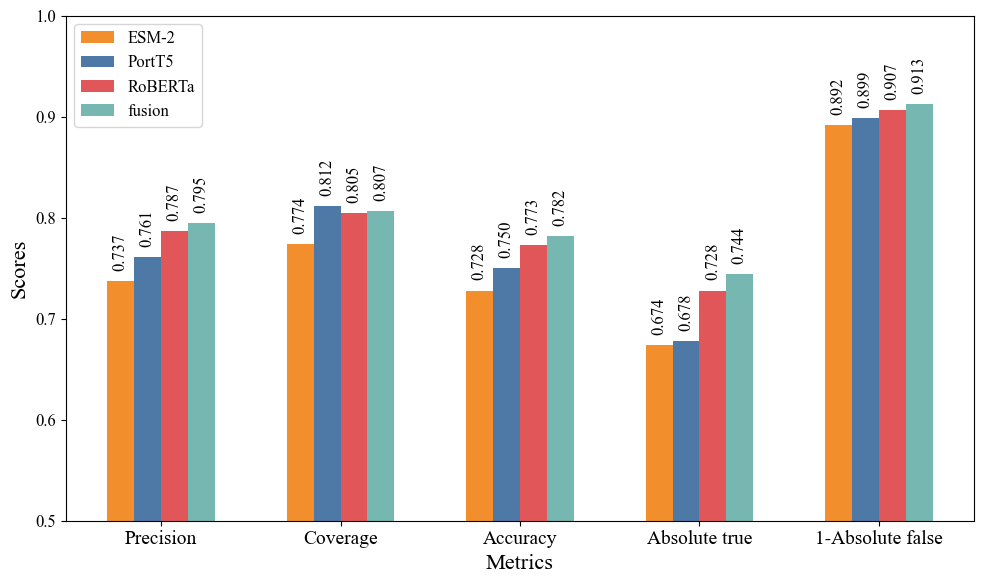

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def create_custom_bar_plot(df, title, y_min=None, y_max=None, save_path=None):
    labels = df.columns[1:]  # 提取数据框中的指标名称
    models = df.iloc[:, 0]   # 提取模型名称
    data = df.iloc[:, 1:].values  # 提取每个模型的数据
    
    x = np.arange(len(labels))  # 设置x轴上指标的位置
    width = 0.15  # 条形的宽度

    # 设置全局字体
    plt.rcParams['font.family'] = 'Times New Roman'  # 设置字体为 SimHei（黑体）
    plt.rcParams['font.size'] = 12  # 设置全局字体大小

    fig, ax = plt.subplots(figsize=(10, 6))

    # 定义颜色
    colors = ['#f28e2c', '#4e79a7', '#e15759', '#76b7b2', '#59a14f', '#edc949', '#9998FF', '#9193B4', '#BABABA']
    
    # 使用自定义颜色绘制每个模型的数据
    for i, model in enumerate(models):
        ax.bar(x + i * width, data[i], width, label=model, color=colors[i % len(colors)])

    # 设置轴标签、标题和刻度
    ax.set_xlabel('Metrics', fontsize=16)
    ax.set_ylabel('Scores', fontsize=16)
    ax.set_title(title, fontsize=14)
    ax.set_xticks(x + width * (len(models) / 2 - 0.5))
    ax.set_xticklabels(labels, fontsize=14)

    # 设置y轴范围
    if y_min is not None and y_max is not None:
        ax.set_ylim(y_min, y_max)
    
    # 在每个条形上方添加数值
    for i in range(len(models)):
        for j in range(len(labels)):
            ax.text(x[j] + i * width, data[i][j] + 0.01, f'{data[i][j]:.3f}', ha='center', va='bottom', fontsize=12, rotation=90)

    # 添加图例和布局调整
    ax.legend(loc='upper left')
    plt.tight_layout()
    # 保存图像
    if save_path is not None:
        plt.savefig(save_path, dpi=300)
    plt.show()

# Load the Excel file
file_path = 'draw/data/Data.xlsx'

# Read both sheets: ACE and ACP
data_bar = pd.read_excel(file_path, sheet_name='GCN')

create_custom_bar_plot(data_bar, title=None, y_min=0.5, y_max=1, save_path='draw/image/GCN_date.png')


### draw

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def create_custom_polar_bar_plot(df, title, save_path=None):
    labels = df.columns[1:]  # 提取数据框中的指标名称
    models = df.iloc[:, 0]   # 提取模型名称
    data_1 = df.iloc[:, 1].values*100  # 提取每个模型的数据
    data_2 = df.iloc[:, 2].values*100  # 提取每个模型的数据
    data_3 = df.iloc[:, 3].values*100  # 提取每个模型的数据
    data_4 = df.iloc[:, 4].values*100  # 提取每个模型的数据
    data_5 = df.iloc[:, 5].values*100  # 提取每个模型的数据
    data = [data_1, data_2, data_3, data_4, data_5]

    label_colors = ['#F39B7F', '#3C5488', '#00A087', '#4DBBD5', '#E64B35']

    # 设置全局字体
    plt.rcParams['font.family'] = 'Times New Roman'  # 设置字体为 SimHei（黑体）
    plt.rcParams['font.size'] = 12  # 设置全局字体大小

    # 画图
    fig = plt.figure(figsize=(4, 4), dpi=300, facecolor='white')
    ax = fig.add_subplot(projection='polar')
    
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    
    radii = [0]
    colors = ['white']
    for g, c in zip(data, label_colors):
        radii.extend(g-25)      # 控制数据最小值
        colors.extend([c]*len(g))
        radii.append(0)
        colors.append('white')
    radii.pop()
    colors.pop()
    
    N = len(radii)
    scale_lim = 50   # 比例尺的最大值
    scale_major = 10    # 刻度间隔
    bottom = 90      # 柱状图的底部高度
    theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
    width = 2.2 * np.pi / (N + 9)
    
    # 画出柱状图
    ax.bar(theta, radii, width=width, bottom=bottom, color=colors)
    
    # 画出刻度
    def scale(ax, bottom, scale_lim, theta, width):
        t = np.linspace(theta-width/2, theta+width/2, 6)
        for i in range(int(bottom), int(bottom+scale_lim+scale_major), scale_major):
            ax.plot(t, [i]*6, linewidth=0.25, color='gray', alpha=0.8)
    
    # 画出刻度值
    def scale_value(ax, bottom, theta, scale_lim):
        for i in range(int(bottom), int(bottom+scale_lim+scale_major), scale_major):
            ax.text(theta,
                    i,
                    f'{i-bottom}',
                    fontsize=3,
                    alpha=0.8,
                    va='center',
                    ha='center'
                    )
    
    s_list = []
    g_no = 0
    for t, r in zip(theta, radii):
        if r == 0:
            s_list.append(t)
            if t == 0:
                # 添加刻度
                # scale_value(ax, bottom, t, scale_lim)
                # 隐藏刻度线
                scale(ax, bottom, scale_lim, t, width)
            else:
                scale(ax, bottom, scale_lim, t, width)
        else:
            t2 = np.rad2deg(t)
            # 标出每根柱的名称
            ax.text(t, r + bottom + scale_major*0.6,
                    models[g_no],
                    fontsize=7,
                    rotation=90-t2 if t < np.pi else 270-t2,
                    rotation_mode='anchor',
                    va='center',
                    ha='left' if t < np.pi else 'right',
                    color='black',
                    clip_on=False
                    )
            if g_no == (len(models)-1):
                g_no = 0
            else:
                g_no += 1
    
    
    s_list.append(2 * np.pi)
    
    # 标签设置
    for i in range(len(s_list)-1):
        t = np.linspace(s_list[i]+width, s_list[i+1]-width, 50)
        ax.plot(t, [bottom-scale_major*0.4]*50, linewidth=0.5, color='black')
        ax.text(s_list[i]+(s_list[i+1]-s_list[i])/2,
                bottom-scale_major*2,
                # labels[i],
                labels[i].replace(" ", "\n"),  # 手动在标签中插入换行符(保证标签为字符串)
                va='center',
                ha='center',
                fontsize=7,
                )
    
    ax.set_rlim(30, bottom+scale_lim+scale_major)
    ax.axis('off')
    # plt.tight_layout()
    # 保存图像
    if save_path is not None:
        plt.savefig(save_path, dpi=300)
    
    plt.show()

# Load the Excel file
file_path = 'draw/data/Data.xlsx'
data_polar = pd.read_excel(file_path, sheet_name='exist')

create_custom_polar_bar_plot(data_polar, title=None, save_path='draw/image/polar.png')
